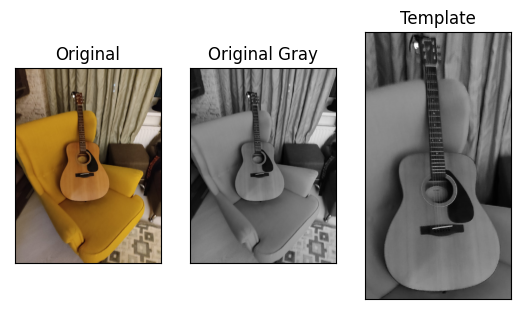

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

#Загружаем изображения
img = cv2.imread('data/img1.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
template = cv2.imread('data/img1.1.jpg', 0)

titles = ['Original', 'Original Gray', 'Template']
images = [img, img_gray, template]

#Вывод mathplotlib
for i in range(3):
    plt.subplot(1,3,i+1),plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

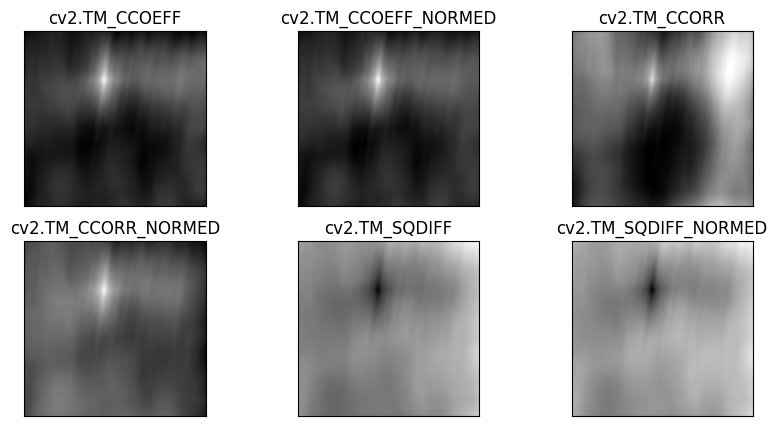

In [3]:
results = []

#методы для сравнения
methods = ['cv2.TM_CCOEFF', 
           'cv2.TM_CCOEFF_NORMED',
           'cv2.TM_CCORR',
           'cv2.TM_CCORR_NORMED',
           'cv2.TM_SQDIFF',
           'cv2.TM_SQDIFF_NORMED']

#Пробегаемся по всем методам
for method in methods:
    results.append(cv2.matchTemplate(img_gray, template, eval(method)))

#Вывод mathplotlib
plt.figure(figsize=(10,5))
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(results[i], cmap='gray')
    plt.title(methods[i])
    plt.xticks([]),plt.yticks([])
plt.show()

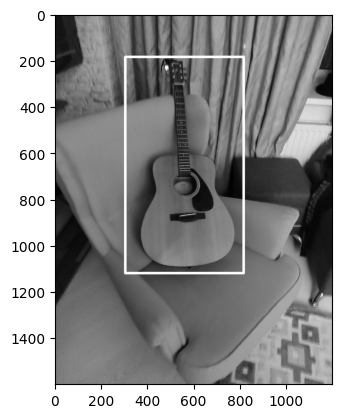

In [5]:
#Отрисовываем рамку
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(results[4]) #используем метод TM_SQDIFF

top_left = min_loc 
bottom_right = (top_left[0] + template.shape[1], top_left[1] + template.shape[0])
cv2.rectangle(img_gray, top_left, bottom_right, 255, 10) 

#Вывод mathplotlib
plt.imshow(cv2.cvtColor(img_gray, cv2.COLOR_BGR2RGB))
plt.show()